In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt                  # Importing Libraries
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')       # Loading Dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1) Data Exploration

In [3]:
df.isnull().sum()     # Checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()           # Checking for Data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T    # Checking for stats of columns

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


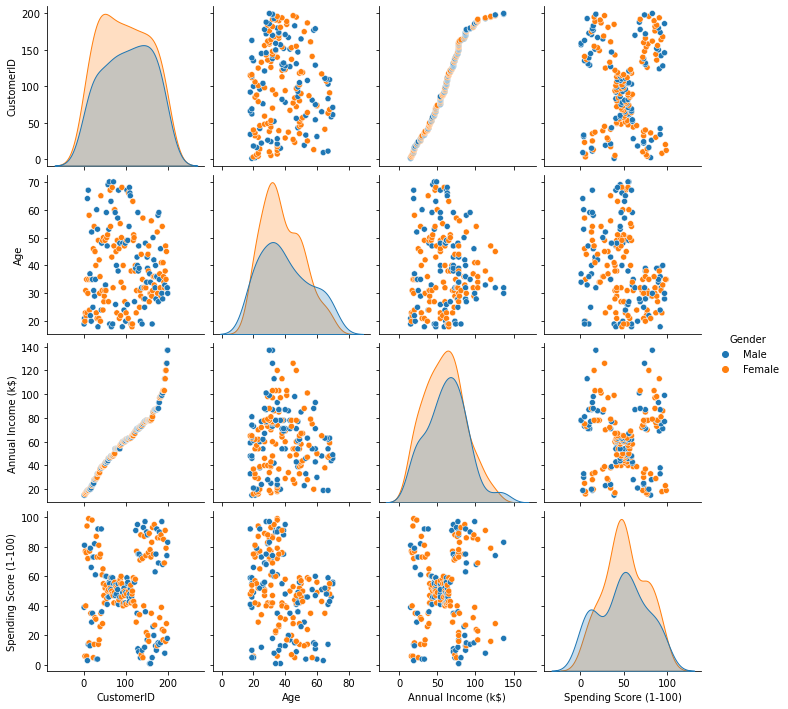

In [6]:
sns.pairplot(data=df, hue = 'Gender')

### 2) Data Transformation

In [7]:
scaler=StandardScaler()
num_col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']#Using StandardScaler for standardizing 
df[num_col]=scaler.fit_transform(df[num_col])   #numeric variables scales the data and replaces original value

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [9]:
encoder=OneHotEncoder(sparse=False, drop='first') #OneHotEncoder is used to encode categorical variable('Gender')
enc_gender=encoder.fit_transform(df[['Gender']])  #into binary columns (1-Male, 0-Female)
df=df.drop('Gender',axis=1)
df[['Geder_Male']]=enc_gender

In [10]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Geder_Male
0,1,-1.424569,-1.738999,-0.434801,1.0
1,2,-1.281035,-1.738999,1.195704,1.0
2,3,-1.352802,-1.700830,-1.715913,0.0
3,4,-1.137502,-1.700830,1.040418,0.0
4,5,-0.563369,-1.662660,-0.395980,0.0


### 3) Elbow Curve

In [11]:
x=df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']]
ssd = []                                            # sum of squared distance
k_values = range(1,11)                              # analysing optimal no of clusters
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)

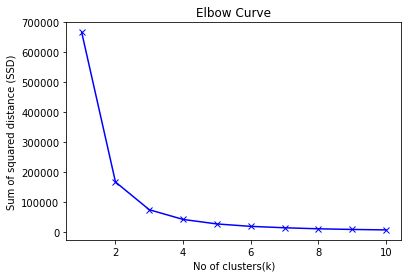

In [12]:
plt.plot(k_values, ssd,'bx-')
plt.xlabel('No of clusters(k)')
plt.ylabel('Sum of squared distance (SSD)')
plt.title('Elbow Curve')
plt.show()

### 4) Data modelling using K-means algorithms

In [13]:
k=4
kmeans=KMeans(n_clusters=k, random_state=42)            # at k=4, rate of decrease slows down significantly
kmeans.fit(x)
labels=kmeans.labels_
df['Clusters']=labels

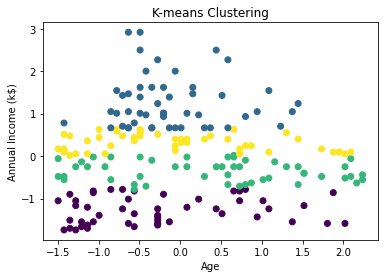

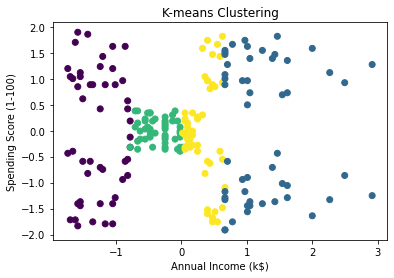

In [14]:
x_axis='Age'
y_axis='Annual Income (k$)'          # Age vs Annual income K_means cluster
plt.scatter(df[x_axis], df[y_axis], c = df['Clusters'], cmap='viridis')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('K-means Clustering')
plt.show()



x_axis='Annual Income (k$)'
y_axis='Spending Score (1-100)'         # CustomerID vs 'Spending Score' K_means cluster
plt.scatter(df[x_axis], df[y_axis], c = df['Clusters'], cmap='viridis')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('K-means Clustering')
plt.show()

### 5) Data modelling using multiple clustering algorithms

In [15]:
agg_clustering = AgglomerativeClustering(n_clusters=4)            # Agglomerative Clustering
agg_clustering.fit(x)
agg_labels=agg_clustering.fit_predict(x)


gmm=GaussianMixture(n_components=4)                               # Gaussian Mixture
gmm.fit(x)
gmm_labels=gmm.predict(x)


dbscan=DBSCAN(eps=0.3, min_samples=5)                            # DBSCAN
dbscan_labels=dbscan.fit_predict(x)

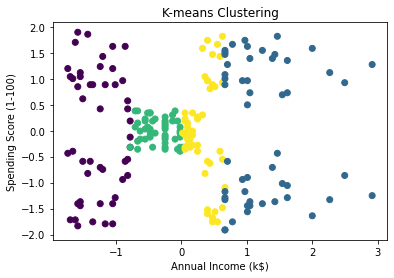

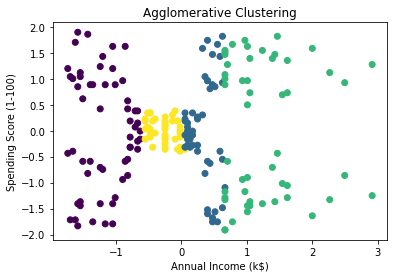

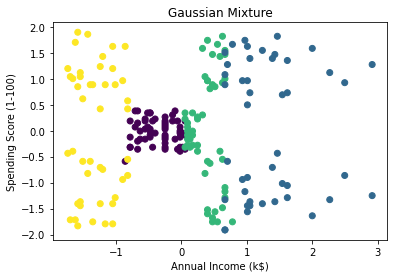

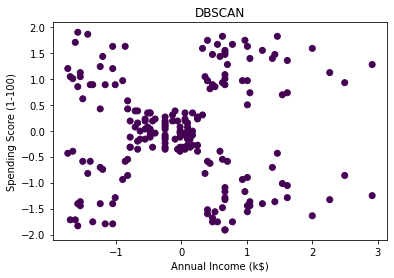

In [16]:
x_axis='Annual Income (k$)'
y_axis='Spending Score (1-100)'   

# Visualizing all clustering algorithms on Annual Income and Spending score

plt.scatter(df[x_axis], df[y_axis], c = df['Clusters'], cmap='viridis')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('K-means Clustering')
plt.show()

plt.scatter(df[x_axis], df[y_axis], c = agg_labels, cmap='viridis')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Agglomerative Clustering')
plt.show()
         
plt.scatter(df[x_axis], df[y_axis], c = gmm_labels, cmap='viridis')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Gaussian Mixture')
plt.show()
        
plt.scatter(df[x_axis], df[y_axis], c = dbscan_labels, cmap='viridis')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('DBSCAN')
plt.show()

### 6) Comparing and choosing the best clustering algorithm (On the basis of Silhouette Score)

In [17]:
algorithms = {'Kmeans': KMeans(n_clusters = k, random_state = 27),'DBSCAN': DBSCAN(), 'Agglomerative Clustering': AgglomerativeClustering(n_clusters = k), 'Gaussian Mixture Models': GaussianMixture(n_components = k, random_state = 27)}

silhouette_scores = {}

for name, algorithm in algorithms.items():
    
    score = silhouette_score(x, labels)
    silhouette_scores[name] = score

print("Silhouette Scores:")
for name, score in silhouette_scores.items():
    print(f"{name}: {score}")

best_algorithm = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_algorithm]

print("\nBest Algorithm:")
print(f"{best_algorithm} (Silhouette Score: {best_score})")

Silhouette Scores:
Kmeans: 0.5585653276519673
DBSCAN: 0.5585653276519673
Agglomerative Clustering: 0.5585653276519673
Gaussian Mixture Models: 0.5585653276519673

Best Algorithm:
Kmeans (Silhouette Score: 0.5585653276519673)
